In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
import env
import math


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import telco_wrangle

import env
import wrangle
import wrangle_2
import telco_wrangle

### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
train, validate, test = telco_wrangle.split_this_data(telco_wrangle.clean_telco(telco_wrangle.get_telco_data()))


In [3]:
train.shape

(3943, 32)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4339 to 593
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3943 non-null   int64  
 1   tenure                                 3943 non-null   int64  
 2   monthly_charges                        3943 non-null   float64
 3   total_charges                          3943 non-null   float64
 4   is_male                                3943 non-null   uint8  
 5   has_partner                            3943 non-null   uint8  
 6   has_dependent                          3943 non-null   uint8  
 7   has_phone_service                      3943 non-null   uint8  
 8   has_paperless_billing                  3943 non-null   uint8  
 9   has_churned                            3943 non-null   uint8  
 10  multiple_lines_no_phone_service        3943 non-null   uint8  
 11  ha

### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

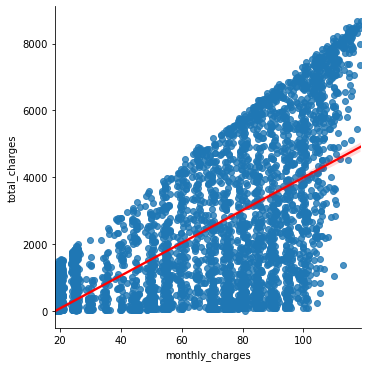

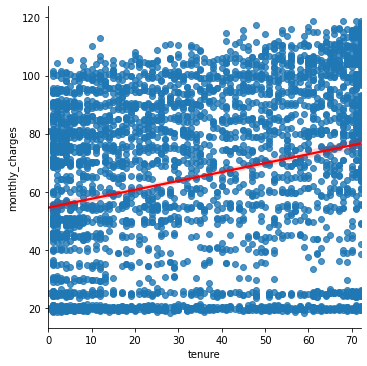

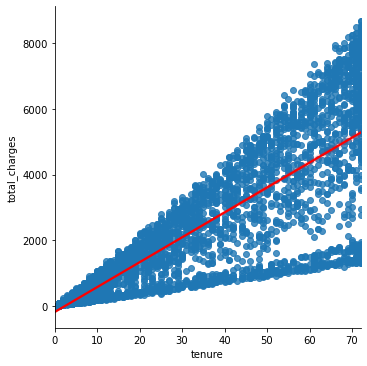

In [5]:
sns.lmplot(data=train, x='monthly_charges', y='total_charges', line_kws={'color':'red'})
sns.lmplot(data=train, x='tenure', y='monthly_charges', line_kws={'color':'red'})
sns.lmplot(data=train, x='tenure', y='total_charges', line_kws={'color':'red'})

In [6]:
def plot_variable_pairs(df):
    sns.lmplot(data=df, x='monthly_charges', y='total_charges', line_kws={'color':'red'})
    sns.lmplot(data=df, x='tenure', y='monthly_charges', line_kws={'color':'red'})
    sns.lmplot(data=df, x='tenure', y='total_charges', line_kws={'color':'red'})
    plt.show()
    return train.corr()['has_churned']

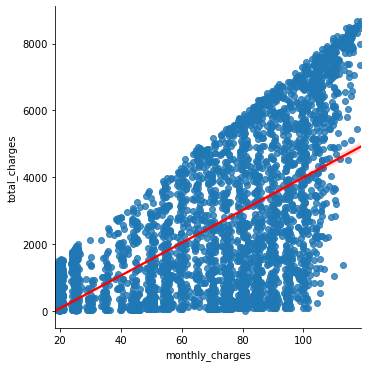

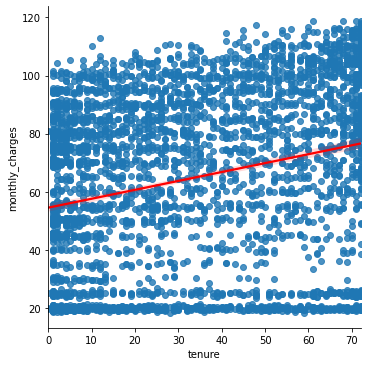

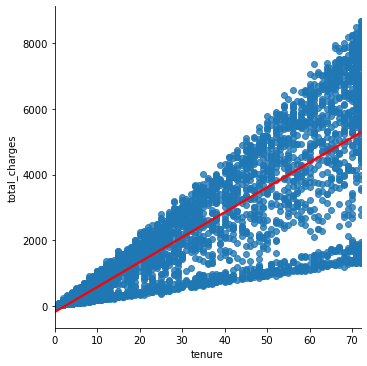

senior_citizen                           0.137053
tenure                                  -0.363998
monthly_charges                          0.184489
total_charges                           -0.212966
is_male                                 -0.020294
has_partner                             -0.160889
has_dependent                           -0.157729
has_phone_service                        0.003720
has_paperless_billing                    0.204327
has_churned                              1.000000
multiple_lines_no_phone_service         -0.003720
has_multiple_lines                       0.038407
online_security_no_internet_service     -0.231605
has_online_security                     -0.184236
online_backup_no_internet_service       -0.231605
has_online_backup                       -0.083648
device_protection_no_internet_service   -0.231605
has_device_protection                   -0.073265
tech_support_no_internet_service        -0.231605
has_tech_support                        -0.172862


In [7]:
plot_variable_pairs(train)


### 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [8]:
def months_to_years(telco):
    telco["tenure_years"] = (round(telco.tenure/12)).astype(int)
    return telco

In [9]:
train  = months_to_years(train)
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,is_male,has_partner,has_dependent,has_phone_service,has_paperless_billing,has_churned,...,internet_service_type_fiber_optic,internet_service_type_None,payment_type_bank_transfer_A,payment_type_credit_card_A,payment_type_electronic_check_M,payment_type_mailed_check_M,month_to_month_contract,one_year_contract,two_year_contract,tenure_years
4339,0,25,71.05,1837.70,0,1,0,1,1,0,...,0,0,0,0,0,1,1,0,0,2
2680,1,44,89.15,3990.75,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,4
1147,0,35,95.50,3418.20,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,3
755,1,38,102.60,4009.20,1,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,3
4463,0,8,43.45,345.50,1,1,1,1,1,0,...,0,0,0,0,0,1,0,1,0,1


### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4339 to 593
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3943 non-null   int64  
 1   tenure                                 3943 non-null   int64  
 2   monthly_charges                        3943 non-null   float64
 3   total_charges                          3943 non-null   float64
 4   is_male                                3943 non-null   uint8  
 5   has_partner                            3943 non-null   uint8  
 6   has_dependent                          3943 non-null   uint8  
 7   has_phone_service                      3943 non-null   uint8  
 8   has_paperless_billing                  3943 non-null   uint8  
 9   has_churned                            3943 non-null   uint8  
 10  multiple_lines_no_phone_service        3943 non-null   uint8  
 11  ha

<AxesSubplot:xlabel='senior_citizen', ylabel='total_charges'>

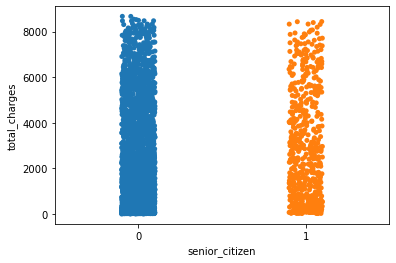

In [11]:
#stripplot
sns.stripplot(x='senior_citizen', y='total_charges', data=train)

<AxesSubplot:xlabel='internet_service_type_fiber_optic', ylabel='tenure'>

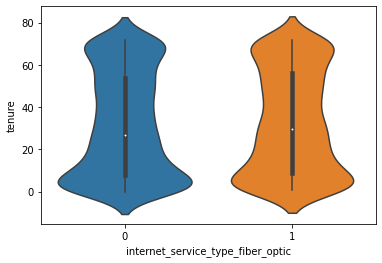

In [12]:
#violinplot
sns.violinplot(x='internet_service_type_fiber_optic', y='tenure', data=train)

<AxesSubplot:xlabel='senior_citizen', ylabel='monthly_charges'>

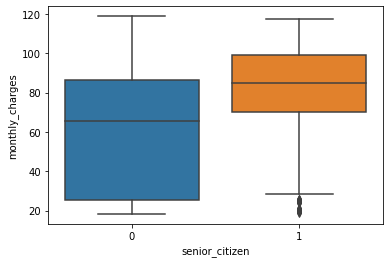

In [13]:
#boxplot
sns.boxplot(x='senior_citizen', y='monthly_charges', data=train)

<AxesSubplot:xlabel='has_multiple_lines', ylabel='total_charges'>

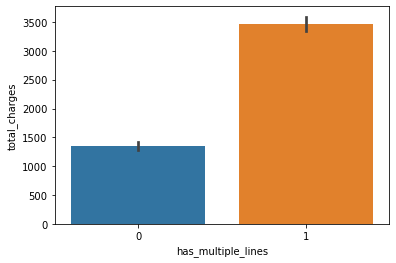

In [14]:
#barplot
sns.barplot(x='has_multiple_lines', y='total_charges', data=train)

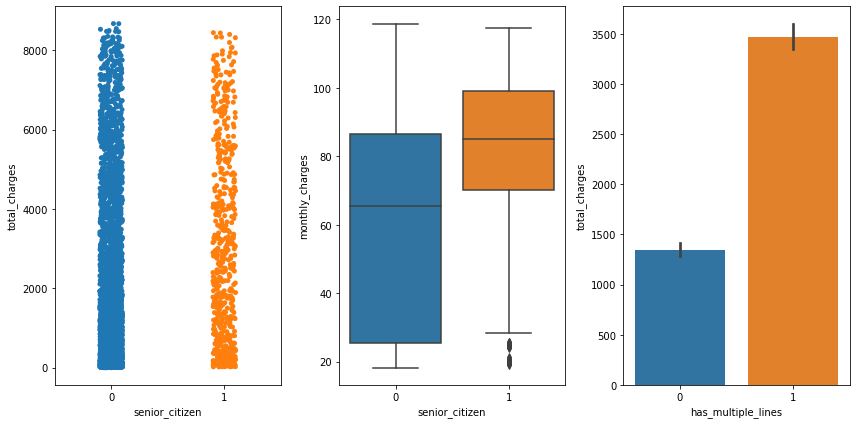

In [15]:
# set figure size
fig = plt.figure(figsize=(12,6))
# stripplot
plt.subplot(1, 3, 1)
sns.stripplot(x='senior_citizen', y='total_charges', data=train)
# boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='senior_citizen', y='monthly_charges', data=train)
# barplot
plt.subplot(1, 3, 3)
sns.barplot(x='has_multiple_lines', y='total_charges', data=train)
# fix spacing
plt.tight_layout();

In [16]:
#plot categorical and continuous vars
# outputs 3 different plots

Commented out code for when I attempted on Zillow:

In [17]:
# col_list = col_list = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']
# col_list

In [18]:
# sns.pairplot(train[col_list])
# plt.show()

In [19]:
# col_list = ['year_built', 'fips']
# train_corr = train.drop(columns=col_list).corr()
# train_corr

In [20]:
# plt.figure(figsize=(12,8))
# sns.heatmap(train_corr, cmap='Purples', annot=True, linewidth=1, mask= np.triu(train_corr))

In [21]:
# def get_heatmap(df,target):
#     heatmap = sns.heatmap(train.corr()[[target]].sort_values(by=target, ascending=False), vmin=-1, vmax=1, annot=True, cmap='rocket')
#     heatmap.set_title(f'Features Correlating with {target}', fontdict={'fontsize':18}, pad=16);

In [22]:
# def plot_categorical_and_continuous_vars(df, cat_vars, quant_vars):
#     sns.barplot(data=df, y=quant_vars, x=cat_vars)
#     plt.show()
#     sns.violinplot(data=df, y=quant_vars, x=cat_vars)
#     plt.show()
#     sns.boxplot(data=df, y=quant_vars, x=cat_vars)

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file

In [23]:
# Done

### 6. Explore your dataset with any other visualizations you think will be helpful.


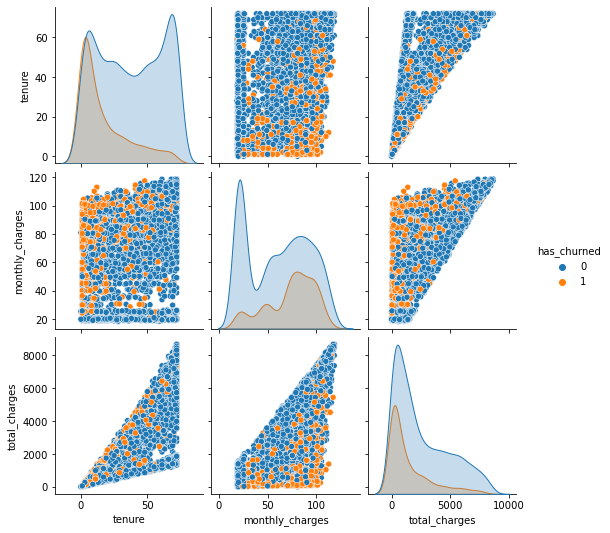

In [24]:
sns.pairplot(data=train, vars=train[['tenure', 'monthly_charges', 'total_charges']], hue='has_churned')


Exercises II - Challenge
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

### 1. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.



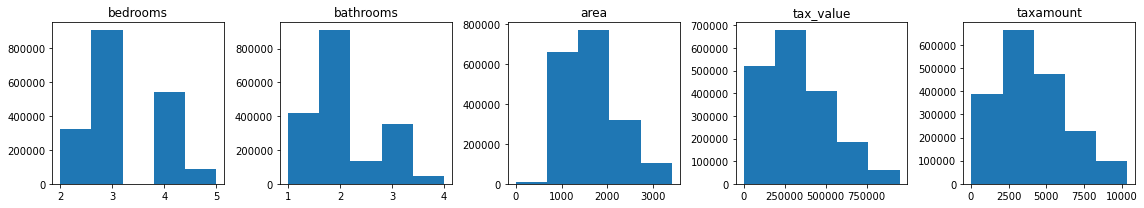

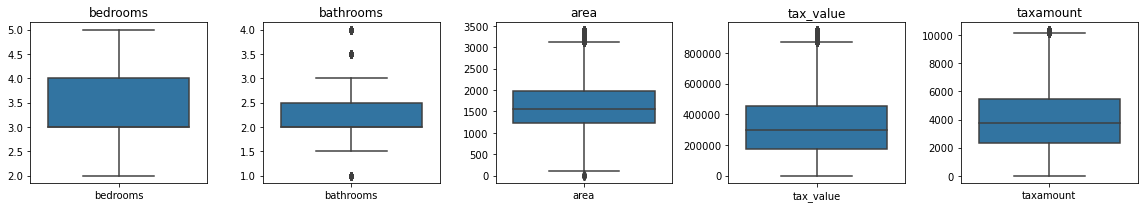

In [25]:
#Wrangle Time

train, validate, test = wrangle_2.wrangle_zillow()

In [26]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  float64
 5   taxamount   1038959 non-null  float64
 6   fips        1038959 non-null  object 
dtypes: float64(6), object(1)
memory usage: 63.4+ MB


### 2. Come up with some initial hypotheses based on your goal of predicting property value.


### 3. Visualize all combinations of variables in some way.


In [28]:
def plot_variable_pairs(train):
    sns.pairplot(train, kind='reg',plot_kws={'line_kws':{'color':'black'}})

In [29]:
features = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

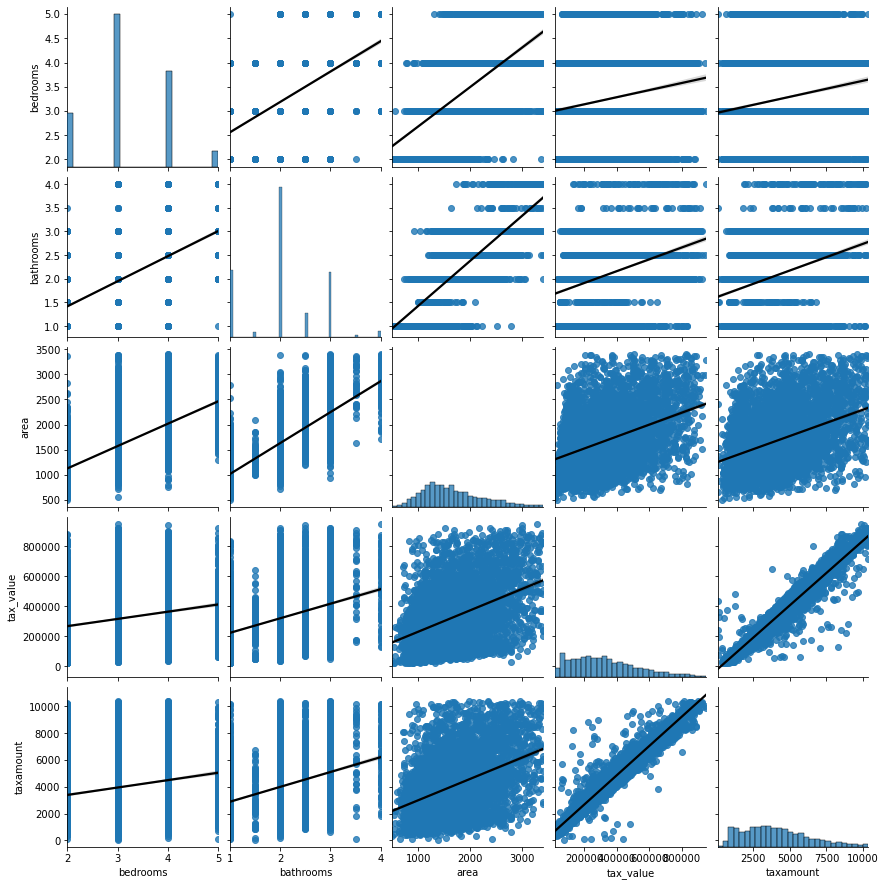

In [30]:
# using .sample() for quicker output

plot_variable_pairs(train[features].sample(5_000))

In [31]:
# let's change square feet of tax_value to square yards
# 1sqft = .111111sqyd

In [32]:
area_sq_ft = train.area * .111111

In [33]:
area_sq_ft.head(5)

10057      173.444271
2004970    196.666470
306031     161.333172
1038595    111.111000
270959     219.333114
Name: area, dtype: float64

In [34]:
train.area.head(5)

10057      1561.0
2004970    1770.0
306031     1452.0
1038595    1000.0
270959     1974.0
Name: area, dtype: float64

In [35]:
def area_sq_ft (train):
    return (train.area * .111111)

In [36]:
area_sq_ft(train).head()

10057      173.444271
2004970    196.666470
306031     161.333172
1038595    111.111000
270959     219.333114
Name: area, dtype: float64